In [8]:
import simpy
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime

passengers_data = pd.read_csv('passengers_4.csv')
passengers_data['ArrivalTime'] = pd.to_datetime(passengers_data['ArrivalTime'], unit='s')

time_interval_minutes = 15

arrival_counts = passengers_data['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
arrival_counts = arrival_counts.sort_index()
arrival_counts

time_interval_minutes = 15
time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')

arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
arrival_df['TimePeriod'] = arrival_df.index
arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
arrival_df.reset_index(drop=True, inplace=True)
arrival_df = arrival_df[["TimePeriod", "ArrivalCount"]]

security_data = pd.read_csv('security.csv')
security_data['Time'] = pd.to_datetime(security_data['Time'], unit='s')

# Merge security_data and arrival_df based on the 'Time' column
merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
# Drop unnecessary columns, if needed
merged_data.drop(columns=['TimePeriod'], inplace=True)

# Filter data for the desired time range (before 12:00)
filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row["ArrivalCount"], 0), axis=1)
filtered_data = filtered_data[["Time","ArrivalCount","Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

filtered_data

C:\Users\14399\AppData\Local\Temp/ipykernel_8456/1274697727.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
C:\Users\14399\AppData\Local\Temp/ipykernel_8456/1274697727.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
C:\Users\14399\AppData\Local\Temp/ipykernel_8456/1274697727.py:40: SettingWithCopyWarning: 
A

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
0,1970-01-01 00:00:00,0.0,1,45,0.0,45.0
1,1970-01-01 00:15:00,0.0,1,45,0.0,45.0
2,1970-01-01 00:30:00,0.0,1,45,0.0,45.0
3,1970-01-01 00:45:00,0.0,1,45,0.0,45.0
4,1970-01-01 01:00:00,0.0,1,45,0.0,45.0
5,1970-01-01 01:15:00,0.0,1,45,0.0,45.0
6,1970-01-01 01:30:00,0.0,1,45,0.0,45.0
7,1970-01-01 01:45:00,1.0,1,45,0.0,44.0
8,1970-01-01 02:00:00,1.0,1,45,0.0,44.0
9,1970-01-01 02:15:00,1.0,1,45,0.0,44.0


Peak periods:
1970-01-01 04:00:00     44
1970-01-01 04:15:00     82
1970-01-01 04:30:00    113
1970-01-01 04:45:00     90
1970-01-01 05:00:00     74
1970-01-01 05:15:00     65
1970-01-01 05:30:00     39
1970-01-01 07:30:00     65
1970-01-01 07:45:00    106
1970-01-01 08:00:00    105
1970-01-01 08:15:00    123
1970-01-01 08:30:00    133
1970-01-01 08:45:00     97
1970-01-01 09:00:00     94
1970-01-01 09:15:00     52
1970-01-01 09:30:00     42
Name: ArrivalTime, dtype: int64


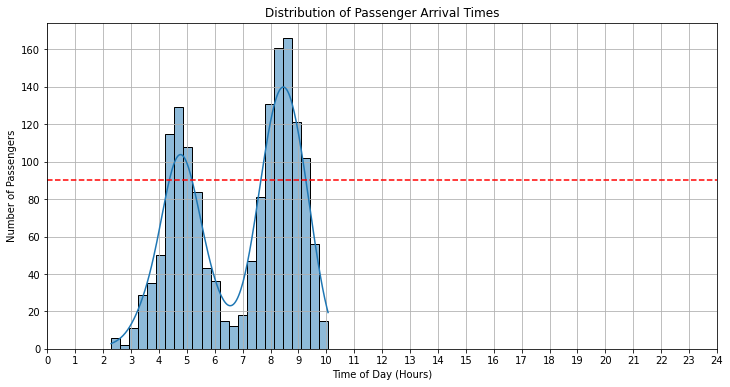

In [2]:
passengers_data = pd.read_csv('passengers_0.csv')
passengers_data["ArrivalTime_hour"] = passengers_data["ArrivalTime"]/3600

# Plotting the distribution of arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['ArrivalTime_hour'], bins=24, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 25))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')

peak_periods = arrival_counts[arrival_counts > arrival_counts.median()]
print("Peak periods:")
print(peak_periods)

In [15]:
#Peak periods 1
peak_periods1_start = datetime.strptime('1970-01-01 04:15', "%Y-%m-%d %H:%M")
peak_periods1_end = datetime.strptime('1970-01-01 05:15', "%Y-%m-%d %H:%M")

TW1_1_start = datetime.strptime('1970-01-01 05:30', "%Y-%m-%d %H:%M")
TW1_1_end = datetime.strptime('1970-01-01 05:45', "%Y-%m-%d %H:%M")

TW1_2_start = datetime.strptime('1970-01-01 05:45', "%Y-%m-%d %H:%M")
TW1_2_end = datetime.strptime('1970-01-01 06:00', "%Y-%m-%d %H:%M")
                               
TW1_3_start = datetime.strptime('1970-01-01 06:00', "%Y-%m-%d %H:%M")
TW1_3_end = datetime.strptime('1970-01-01 06:15', "%Y-%m-%d %H:%M")
                               
TW1_4_start = datetime.strptime('1970-01-01 06:15', "%Y-%m-%d %H:%M")
TW1_4_end = datetime.strptime('1970-01-01 06:30', "%Y-%m-%d %H:%M")

# #_XC6333: Depature time: 06:00
# TW1_1

# #OO2037: Depature time: 06:15
# TW1_1, TW1_2

# #HP4524: Depature time: 06:30
# TW1_1, TW1_2, TW1_3

# #DN7022: Depature time: 06:45
# TW1_1, TW1_2, TW1_3, TW1_4


#Piek periods 2
peak_periods2_start =datetime.strptime('1970-01-01 07:30', "%Y-%m-%d %H:%M")
peak_periods2_end = datetime.strptime('1970-01-01 09:00', "%Y-%m-%d %H:%M")
                                
TW2_1_start = datetime.strptime('1970-01-01 09:15', "%Y-%m-%d %H:%M")
TW2_1_end = datetime.strptime('1970-01-01 09:30', "%Y-%m-%d %H:%M")

TW2_2_start = datetime.strptime('1970-01-01 09:30', "%Y-%m-%d %H:%M")
TW2_2_end = datetime.strptime('1970-01-01 09:45', "%Y-%m-%d %H:%M")
                               
TW2_3_start = datetime.strptime('1970-01-01 09:45', "%Y-%m-%d %H:%M")
TW2_3_end = datetime.strptime('1970-01-01 10:00', "%Y-%m-%d %H:%M")
                               
TW2_4_start = datetime.strptime('1970-01-01 10:00', "%Y-%m-%d %H:%M")
TW2_4_end = datetime.strptime('1970-01-01 10:15', "%Y-%m-%d %H:%M")

TW2_5_start = datetime.strptime('1970-01-01 10:15', "%Y-%m-%d %H:%M")
TW2_5_end = datetime.strptime('1970-01-01 10:30', "%Y-%m-%d %H:%M")

# #SS2446: Depature time: 09:45
# TW2_1
                                
# #ZI1701: Depature time: 10:00
# TW2_1, TW2_2

# #HC1255: Depature time: 10:15
# TW2_1, TW2_2, TW2_3

# #HF1818: Depature time: 10:30
# TW2_1, TW2_2, TW2_3, TW2_4

# #IG2596: Depature time: 10:45
# TW2_1, TW2_2, TW2_3, TW2_4, TW2_5

# Simulation

In [6]:
# List to store the waiting time of each passenger
waiting_time_list = []
# Counter to track the number of passengers currently waiting
waiting_passengers = 0
# Interval for calculating average waiting time (15 minutes in seconds)
time_interval = 15 * 60
# List to store waiting times for each interval
waiting_time_intervals = []
# List to store the average waiting time for each interval
average_waiting_times = []
time_intervals_start = []  # 存储每个时间段的开始时间

def generate_processing_time():
    # Generates processing time for a passenger based on exponential distribution
    #15/45*60 = 20
    return random.expovariate(1 / 20.0)

def security_check(env, passenger_id, security_lanes, current_lane):
    global waiting_passengers, waiting_time_intervals

    arrival_time = env.now
    print(f"Passenger {passenger_id} arrived at {arrival_time}")
    waiting_passengers += 1

    with current_lane.request() as request:
        yield request
        processing_start = env.now
        yield env.timeout(generate_processing_time())
        waiting_time = processing_start - arrival_time
        waiting_time_list.append(waiting_time)
        waiting_passengers -= 1
        waiting_time_intervals[-1].append(waiting_time)
        print(f"Passenger {passenger_id} completed processing at {env.now} (Waiting time: {waiting_time} seconds)")

def passenger_generator(env, security_lanes, passengers_data):
    # Generates passengers based on the arrival time data
    for _, passenger in passengers_data.iterrows():
        passenger_id = passenger['Id']
        arrival_time = passenger['ArrivalTime']
        yield env.timeout(arrival_time - env.now)
        current_lane = security_lanes[-1]
        env.process(security_check(env, passenger_id, security_lanes, current_lane))

def adjust_security_lanes(env, security_lanes, security_data):
    # Adjusts the number of security lanes based on the provided schedule
    for _, row in security_data.iterrows():
        time, lanes = row['Time'], row['Lanes']
        yield env.timeout(time - env.now)
        new_lane = simpy.Resource(env, capacity=lanes)
        security_lanes.append(new_lane)

def calculate_average_waiting_time(env):
    global time_intervals_start
    current_time = 0
    while True:
        yield env.timeout(time_interval)
        current_time += time_interval  # Update the current time to the start of the new time period
        if waiting_time_intervals[-1]: # Make sure the list is not empty
            avg_waiting_time = sum(waiting_time_intervals[-1]) / len(waiting_time_intervals[-1])
            average_waiting_times.append(avg_waiting_time)
        else:
            average_waiting_times.append(0)
        time_intervals_start.append(current_time - time_interval)  # Record the start time of the time period
        waiting_time_intervals.append([])

def run_simulation(sim_time, passengers_data, security_data):
    global waiting_passengers, waiting_time_intervals, average_waiting_times

    env = simpy.Environment()
    security_lanes = [simpy.Resource(env, capacity=security_data['Lanes'].iloc[0])]
    waiting_time_intervals.append([])

    env.process(passenger_generator(env, security_lanes, passengers_data))
    env.process(adjust_security_lanes(env, security_lanes, security_data))
    env.process(calculate_average_waiting_time(env))
    
    env.run(until=sim_time)
    # Convert average wait times to DataFrame
    df_avg_waiting_times = pd.DataFrame(average_waiting_times, columns=['Average Waiting Time'])
    return df_avg_waiting_times

# data import
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')

# run
average_waiting_time_df = run_simulation(40000, passengers_data, security_data)

average_waiting_time_df = pd.DataFrame({
    'Average Waiting Time': average_waiting_times
}, index=time_intervals_start)

Passenger 7W4SUIW8P60C9EZHVKY7 arrived at 8233.117982
Passenger 7W4SUIW8P60C9EZHVKY7 completed processing at 8241.662891954431 (Waiting time: 0.0 seconds)
Passenger TGR0H5TWSF84MFMQUX8C arrived at 8276.390512008185
Passenger TGR0H5TWSF84MFMQUX8C completed processing at 8284.713209000964 (Waiting time: 0.0 seconds)
Passenger 9U7304Z48YAGBHLRQ2C1 arrived at 8868.483377069739
Passenger 9U7304Z48YAGBHLRQ2C1 completed processing at 8886.32812851657 (Waiting time: 0.0 seconds)
Passenger KMIZ1FTYWSB0LAQWT1YX arrived at 8892.912111878226
Passenger KMIZ1FTYWSB0LAQWT1YX completed processing at 8949.509358280593 (Waiting time: 0.0 seconds)
Passenger EH1RELRCS1FWEAKAN0XN arrived at 9024.329169
Passenger EH1RELRCS1FWEAKAN0XN completed processing at 9071.835275469843 (Waiting time: 0.0 seconds)
Passenger NV7KUEARJML65WN17FCG arrived at 9106.285121659166
Passenger NV7KUEARJML65WN17FCG completed processing at 9129.768761189312 (Waiting time: 0.0 seconds)
Passenger 5PPT0WWE5IP8IFFGFLJH arrived at 10188

Passenger GRT59NOIA0KGQY1C4KF8 completed processing at 15653.246676991499 (Waiting time: 57.200990991899744 seconds)
Passenger 749GQFW3NWQY790DA386 completed processing at 15660.716995572844 (Waiting time: 46.075134072681976 seconds)
Passenger OHX965G04V96LC14R49K arrived at 15665.645325128182
Passenger GH53AZ1NCDZH8IGNW4FW arrived at 15678.8313
Passenger N8YU5DIZOTV8BZVUHS33 completed processing at 15685.488888809921 (Waiting time: 38.832427114521124 seconds)
Passenger 9UUHUI90YYNWILRWR60R completed processing at 15688.233851576138 (Waiting time: 39.69631241804018 seconds)
Passenger 8BJVHI7W8XXJ5851BVVJ arrived at 15690.77563447235
Passenger 8C9SEIPP9YZSS5KI17E7 arrived at 15696.065005296545
Passenger VEOT5TTWU3T67BKKELZX completed processing at 15713.221935402356 (Waiting time: 58.392402231556844 seconds)
Passenger CGVET5Q32CLA0XRCO4C5 arrived at 15715.559533504504
Passenger S9DQUNY5CR6WZQ8EYAAF completed processing at 15720.958122800957 (Waiting time: 59.5982322980617 seconds)
Passe

Passenger 3FB3WROBRVEKNISHNENI completed processing at 17418.022255162858 (Waiting time: 261.92774441330766 seconds)
Passenger FBIDEOT4TO020WCSOSQS completed processing at 17422.15400154029 (Waiting time: 17.478951691216935 seconds)
Passenger 0GRKZRI19S3ICUBVTWWM arrived at 17424.533971704037
Passenger 6U9OJJD2AZM1OVCOALU5 completed processing at 17428.242265383 (Waiting time: 14.782966481121548 seconds)
Passenger CWXKJUWLVN8030YQ1760 arrived at 17446.826549658108
Passenger 32DPZVZ4115RHZDZJM2U arrived at 17451.358970820074
Passenger I41XLN93BVLWPG16K1U8 arrived at 17453.90999658731
Passenger MPKLGQ3GO9RL83UROWLV arrived at 17458.38045503514
Passenger 0GRKZRI19S3ICUBVTWWM completed processing at 17462.214899177845 (Waiting time: 0.0 seconds)
Passenger C5J7T376BXZYD56MNMC3 arrived at 17466.82893770137
Passenger XQC9ON7KERMK1ORCMX5K arrived at 17483.103776686254
Passenger RXT4W4I9N95XOVLNP3PS arrived at 17488.782053317824
Passenger 32DPZVZ4115RHZDZJM2U completed processing at 17494.63126

Passenger MYAES1S3DGILTYQ300WC arrived at 21345.48483287636
Passenger IPISPMU77JZRNN39SKV9 completed processing at 21347.734360121154 (Waiting time: 0.0 seconds)
Passenger 936MY19PTDFDGE646GFX completed processing at 21348.834721280855 (Waiting time: 0.0 seconds)
Passenger MYAES1S3DGILTYQ300WC completed processing at 21357.799496818992 (Waiting time: 2.2495272447958996 seconds)
Passenger 5IJ4DXQS8V678ZGKM22I arrived at 21457.01811347908
Passenger C5U6QLX6UO5LWTYCJUTT arrived at 21465.261584834785
Passenger C5U6QLX6UO5LWTYCJUTT completed processing at 21477.50246695124 (Waiting time: 0.0 seconds)
Passenger XHGS4T3SX6Q6QACIOOAR arrived at 21501.20552455609
Passenger 5IJ4DXQS8V678ZGKM22I completed processing at 21504.36025661645 (Waiting time: 0.0 seconds)
Passenger XHGS4T3SX6Q6QACIOOAR completed processing at 21507.416549046688 (Waiting time: 0.0 seconds)
Passenger XB9UZLSYNUGN13T0OSN5 arrived at 21524.897138570115
Passenger XB9UZLSYNUGN13T0OSN5 completed processing at 21528.899686005225

Passenger JXRY5E86G34NLY6ITED5 arrived at 28035.68261405091
Passenger JXRY5E86G34NLY6ITED5 completed processing at 28045.565420958315 (Waiting time: 0.0 seconds)
Passenger 07AB4BJMFLM0NBBI4B8J completed processing at 28049.223811854346 (Waiting time: 6.249102121884789 seconds)
Passenger 1J0NKCS0Y09DC0ONEHBA arrived at 28068.50254074002
Passenger KGL8K6KHGP2R93FLDOS5 arrived at 28073.400923495425
Passenger UF36B581IQBOCATJH4W8 arrived at 28074.164867061307
Passenger RWOOKD2W0KDXKFV3BAJT arrived at 28088.425839515377
Passenger KGL8K6KHGP2R93FLDOS5 completed processing at 28091.203658374936 (Waiting time: 0.0 seconds)
Passenger UIXMAG2DYOANTXMHUF5M arrived at 28091.828209118798
Passenger VTTIMGM8FT0AVDFV4YIM arrived at 28095.07619916861
Passenger 1J0NKCS0Y09DC0ONEHBA completed processing at 28096.413673540752 (Waiting time: 0.0 seconds)
Passenger UF36B581IQBOCATJH4W8 completed processing at 28101.92025819961 (Waiting time: 17.03879131362919 seconds)
Passenger MVGIJBBOM4MT5F962XN6 arrived 

Passenger TFFU0FZAJRQKPC7X1HAL arrived at 30150.86009251445
Passenger WWJ9KZDMB0DS81CCQLI3 arrived at 30156.05195938804
Passenger C9D6C0STH4KSPMSCLMPZ arrived at 30157.31399267235
Passenger PPG3I1UA4LI5ZKNKES8G arrived at 30157.75442
Passenger BW7Q48T9R8RW1V000SNP completed processing at 30172.348842923348 (Waiting time: 169.06620205961372 seconds)
Passenger C6DTEQGJOQAACSBW4TPW arrived at 30173.934118374746
Passenger XPDCG3DYQATKBVOBA8SI arrived at 30174.696542116908
Passenger 6IFGRNZNB37L1RORLBSX arrived at 30182.012697857903
Passenger LGSMI6L2XZB34ZO7NG4E arrived at 30185.024313610505
Passenger NI75DSAYUMO4QC2PT99B arrived at 30185.077232220843
Passenger YNVO3P7N6SIO10KZGA1Q arrived at 30189.56264201788
Passenger IBJWMDR1YHQ5PX797C40 completed processing at 30194.255410999383 (Waiting time: 188.20050385025752 seconds)
Passenger XAEJLODVFNLBNH0EBOEW arrived at 30196.82163765554
Passenger 6XFHL45UZO8UUYU61ALP arrived at 30206.086721839736
Passenger A08V438BJ3Y3DC7WSE8V completed proce

Passenger 4XIG4ZPUOYQACDTIFMZW completed processing at 32948.15922766611 (Waiting time: 68.3488838213234 seconds)
Passenger 4UW85Q6NYN5LP0D65GBL completed processing at 32957.62341076292 (Waiting time: 80.86746798227978 seconds)
Passenger L6Q2IDWMJDFGEOBG7T0O completed processing at 32958.105992388206 (Waiting time: 76.36961357431574 seconds)
Passenger C6DBX1VC5SGHM6QDVK4L arrived at 32959.21973178181
Passenger KJKF5S4IXH58FXFKSNGS completed processing at 32963.434717668984 (Waiting time: 74.73063194667338 seconds)
Passenger HPBELOVZHC532FALJJCL completed processing at 32969.23926200514 (Waiting time: 84.46758339810913 seconds)
Passenger VC79OZMTVD2K9DO9YG8B completed processing at 32980.89679405121 (Waiting time: 76.31149204004032 seconds)
Passenger 2ZVR9ZCFP6S7PPDEUVT8 arrived at 32982.229553861864
Passenger ZQ3X6X8GFRWM8HZ4VYZS arrived at 32984.920144676405
Passenger V7OZRM83ZCVJH5PU4N2A arrived at 32995.02020338185
Passenger ADL27WTMEA702BSH6SUI completed processing at 32995.346856

In [14]:
# List to store the waiting time of each passenger
waiting_time_list = []
# Counter to track the number of passengers currently waiting
waiting_passengers = 0
# Interval for calculating average waiting time (15 minutes in seconds)
time_interval = 15 * 60
# List to store waiting times for each interval
waiting_time_intervals = []
# List to store the average waiting time for each interval
average_waiting_times = []
time_intervals_start = []  # 存储每个时间段的开始时间

def generate_processing_time():
    # Generates processing time for a passenger based on exponential distribution
    #15/45*60 = 20
    return random.expovariate(1 / 20.0)

def security_check(env, passenger_id, security_lanes, current_lane):
    global waiting_passengers, waiting_time_intervals

    arrival_time = env.now
    print(f"Passenger {passenger_id} arrived at {arrival_time}")
    waiting_passengers += 1

    with current_lane.request() as request:
        yield request
        processing_start = env.now
        yield env.timeout(generate_processing_time())
        waiting_time = processing_start - arrival_time
        waiting_time_list.append(waiting_time)
        waiting_passengers -= 1
        waiting_time_intervals[-1].append(waiting_time)
        print(f"Passenger {passenger_id} completed processing at {env.now} (Waiting time: {waiting_time} seconds)")

def passenger_generator(env, security_lanes, passengers_data):
    # Generates passengers based on the arrival time data
    for _, passenger in passengers_data.iterrows():
        passenger_id = passenger['Id']
        arrival_time = passenger['ArrivalTime']
        yield env.timeout(arrival_time - env.now)
        current_lane = security_lanes[-1]
        env.process(security_check(env, passenger_id, security_lanes, current_lane))

def adjust_security_lanes(env, security_lanes, security_data):
    # Adjusts the number of security lanes based on the provided schedule
    for _, row in security_data.iterrows():
        time, lanes = row['Time'], row['Lanes']
        yield env.timeout(time - env.now)
        new_lane = simpy.Resource(env, capacity=lanes)
        security_lanes.append(new_lane)

def calculate_average_waiting_time(env):
    global time_intervals_start
    current_time = 0
    while True:
        yield env.timeout(time_interval)
        current_time += time_interval  # Update the current time to the start of the new time period
        if waiting_time_intervals[-1]: # Make sure the list is not empty
            avg_waiting_time = sum(waiting_time_intervals[-1]) / len(waiting_time_intervals[-1])
            average_waiting_times.append(avg_waiting_time)
        else:
            average_waiting_times.append(0)
        time_intervals_start.append(current_time - time_interval)  # Record the start time of the time period
        waiting_time_intervals.append([])

def run_simulation(sim_time, passengers_data, security_data):
    global waiting_passengers, waiting_time_intervals, average_waiting_times

    env = simpy.Environment()
    security_lanes = [simpy.Resource(env, capacity=security_data['Lanes'].iloc[0])]
    waiting_time_intervals.append([])

    env.process(passenger_generator(env, security_lanes, passengers_data))
    env.process(adjust_security_lanes(env, security_lanes, security_data))
    env.process(calculate_average_waiting_time(env))
    
    env.run(until=sim_time)
    # Convert average wait times to DataFrame
    df_avg_waiting_times = pd.DataFrame(average_waiting_times, columns=['Average Waiting Time'])
    return df_avg_waiting_times

# data import
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')

# run
average_waiting_time_df = run_simulation(40000, passengers_data, security_data)

average_waiting_time_df = pd.DataFrame({
    'Average Waiting Time': average_waiting_times
}, index=time_intervals_start)

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers
0,7W4SUIW8P60C9EZHVKY7,8233.117982,XC6333,21600,130
1,TGR0H5TWSF84MFMQUX8C,8276.390512,XC6333,21600,130
2,9U7304Z48YAGBHLRQ2C1,8868.483377,DN7022,24300,193
3,KMIZ1FTYWSB0LAQWT1YX,8892.912112,BM2616,20700,80
4,EH1RELRCS1FWEAKAN0XN,9024.329169,BM2616,20700,80
...,...,...,...,...,...
1568,QKIIQQNH0A8Y3WSYNGLU,35775.208269,IG2596,38700,153
1569,F0EQM6BRYY85Q4NZH2J5,35880.131839,IG2596,38700,153
1570,UY7Z93EWFE25G8V3T2SO,36064.329083,IG2596,38700,153
1571,2NYE8ABI7P3H1PDHWF1O,36096.379070,IG2596,38700,153


In [19]:
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')
passengers_data = pd.merge(passengers_data, flights_data, left_on='FlightNumber', right_on='FlightNumber', how='left')



# 初始化计数器
channel_capacity = 90
current_channel_count = 0

peak_periods1_start = 4.25*60*60
peak_periods1_end = 5.25*60*60

# 在适当的地方添加这段代码，例如在安检过程的开始
if env.now >= peak_periods1_start and env.now <= peak_periods1_end:
    current_channel_count += 1
    
    # 检查是否达到了通道容量
    if current_channel_count == channel_capacity:
        # 开放虚拟队列，根据规则安排乘客进入不同的time window
        open_virtual_queue(env, passengers_data, time_windows)

        
        
        
def open_virtual_queue(env, passengers_data, time_windows):
    # 根据规则安排乘客进入不同的time window
    for _, passenger in passengers_data.iterrows():
        passenger_arrival_time = passenger['ArrivalTime']
        
        # 根据航班时间和规则安排乘客进入相应的time window
        if peak_periods1_start <= passenger_arrival_time <= peak_periods1_end:
            assigned_time_window = assign_time_window(passenger, time_windows['Peak1'])
            # 在这里执行相应的操作，将乘客加入虚拟队列，并记录安排的time window等信息
            # ...

def assign_time_window(passenger, time_window_rules):
    # 根据规则分配time window
    # 在这里实现你的分配逻辑
    # 返回分配的time window
    TW1_1_start = 5.5*3600 #05:30
    TW1_1_end = 5.75*3600 #05:45
    
    TW1_2_start = 5.75*3600 #05:45
    TW1_2_end = 6*3600 #06:00
    
    TW1_3_start = 6*3600 #06:00
    TW1_3_end = 6.25*3600 #06:15
    
    TW1_4_start = 6.25*3600 #06:15
    TW1_4_end = 6.5*3600 #06:30
    
    DepatureTime1_1 = 20700 #05:45 No TW
    DepatureTime1_2 = 21600 #06:00 TW1
    DepatureTime1_3 = 22500 #06:15 TW1, TW2
    DepatureTime1_4 = 23400 #06:30 TW1, TW2, TW3
    DepatureTime1_5 = 24300 #06:45 TW1, TW2, TW3, TW4
    
    # {"flight": ["starting times"], ...}, {'flight', ["capacity"]}, zip(), duration = 15
    
    
    
                               
    TW2_1_start = 9.25*3600 #09:15
    TW2_1_end = 9.5*3600 #09:30
    
    TW2_2_start = 9.5*3600 #09:30
    TW2_2_end = 9.75*3600 #09:45

    TW2_3_start = 975*3600 #09:45
    TW2_3_end = 10*3600 #10:00
    
    TW2_4_start = 10*3600 #10:00
    TW2_4_end = 10.25*3600 #10:15
    
    TW2_5_start = 10.25*3600 #10:15
    TW2_5_end = 10.5*3600 #10:30
    
    DepatureTime2_1 = 34200 #09:30 NO TW
    DepatureTime2_2 = 35100 #09:45 TW1
    DepatureTime2_3 = 36000 #10:00 TW1, TW2
    DepatureTime2_4 = 36900 #10:15 TW1, TW2, TW3
    DepatureTime2_5 = 37800 #10:30 TW1, TW2, TW3, TW4
    DepatureTime2_6 = 38700 #10:45 TW1, TW2, TW3, TW4, TW5
    
    passenger_departure_time = passenger["DepartureTime"]
    
    



SyntaxError: invalid syntax (Temp/ipykernel_8456/1947575268.py, line 43)

In [18]:
flights_data

,FlightNumber,DepartureTime,Passengers
0,BM2616,20700,80
1,XC6333,21600,130
2,OO2037,22500,180
3,HP4524,23400,70
4,DN7022,24300,193
5,QX7315,34200,164
6,SS2446,35100,199
7,ZI1701,36000,163
8,HC1255,36900,154
9,HF1818,37800,87
